## Задача

#### Условие задачи

Используя схему бегущего счета и итерационные методы, решить задачу:

$\left\{\begin{aligned}
\frac{\partial u}{\partial t} + \frac{2 u e^{u^2} }{1 + e^{u^2} } \frac{\partial u}{\partial x}  = 0,\ ~ 0 < x \leq 1\\
u(x,0)= x^2 + 1\\
u(0,t) = e^{-t}\\
\end{aligned}\\
\right. $

#### Исследование характеристик
В точках пересечения проекций его характеристик, решение будет разрывным. 
Запишем квазилинейное уравнение: 

$a(x,t,u)\frac{\partial u}{\partial x} + b(x,t,u)\frac{\partial u}{\partial t} = c(x,t,u)$

где в нашем случае

$a(x,t,u) = \frac{2 u e^{u^2} }{1 + e^{u^2} }\\
b(x,t,u) = 1\\
c(x,t,u) = 0
$

Тогда уравнение характеристик будет иметь вид:

$\frac{~~dt}{1}=\frac{dx}{\frac{2 u e^{u^2} }{1 + e^{u^2} }} = \frac{du}{0}$

Отсюда

$\left\{\begin{aligned}
u = u(x_{0},t_{0})= const \\
t-t_{0} = \frac{1 + e^{u^2}}{2 u e^{u^2} } (x-x_{0}) \\ 
\end{aligned}\\
\right. $

Воспользуемся начальным и граничным условиями и получим два семейств характеристик:
    
1) $~~t_0=0: ~~~~~ t=\frac{1 + e^{(x_0^2 + 1)^2}}{2 (x_0^2 + 1) e^{(x_0^2 + 1)^2} } (x-x_0)$

2) $~~x_0=0: ~~~~~ t=\frac{1 + e^{e^{-2 t_0}}}{2 e^{-t_0} e^{e^{-2 t_0}} } x +t_0$


Библиотеки:

In [65]:
import math 
from math import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

Определим функции характеристик через массивы, где итерирование будет идти по соответствующему неизвестному параметру: $x_0$ или $t_0$  .

In [80]:
def ch1(x):
    return [((1+exp(x0**2 + 1)**2)/(2*(x0**2 + 1)*exp(x0**2 + 1)**2) * (x-x0)) for x0 in np.arange(0, 1.1, .1)]

def ch2(x):
    return [(((1 + exp(exp(-2*t0))) / (2*exp(-t0)*exp(exp(-2*t0)))) * (x) + t0) for t0 in np.arange(0, 1.1, .1)]

 Создадим массив значений по $x$ от $0$ до $1$ с определенным шагом и соответсвущие массивы для функций с итерированием по $x$. 

In [83]:
x_list = np.arange(0, 1.1, .1)

ch1_list = [ch1(x) for x in x_list]
ch2_list = [ch2(x) for x in x_list]

Построим необходимые графики.

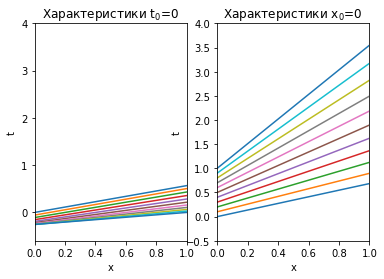

In [82]:
#%matplotlib notebook
%matplotlib inline

plt.subplot(1, 2, 1)
plt.ylim(-0.6,4)
plt.xlim(0,1)
plt.plot(x_list, ch1_list) 
plt.title('Характеристики t$_{0}$=0',loc='center')
plt.ylabel('t')
plt.xlabel('x')
plt.subplot(1, 2, 2)
plt.ylim(-0.5,4)
plt.xlim(0,1)
plt.plot(x_list, ch2_list) 
plt.title('Характеристики x$_{0}$=0',loc='center')
plt.ylabel('t')
plt.xlabel('x')


plt.show()

Как видно, характеристики не пересекаются на промежутке $(0,1)$ , а следовательно отсутствует опрокидывание волны. Таким образом, во всей области решение можно будет представить при помощи разностной схемы.

# Численное решение

## Сетка
Введем в области $\Omega=\{(x,t):0 < x \leq 1,~~0<t<T\} $ сетку с шагом $h_x$ по $x$ и шагом $h_t$ по $t$:
\begin{eqnarray}
\omega_{h_x, ~ h_t}=\begin{cases}
x_n=n\cdot h_x, ~~h_x=\frac{1}{N}, ~~n=\overline{0, N}\\
t_m=m\cdot h_t, ~~h_t=\frac{1}{M}, ~~m=\overline{0, M}
\end{cases}
\end{eqnarray}

На $\omega_{h_x, ~ h_t}$ будем рассматривать сеточную функцию $y^m_{n}=u(x_n,t_m)$

## Шаблон

Приведем исходное уравнение к дивергентному виду: 

$$\frac{\partial u}{\partial t} + \frac{\partial \ln(1 + e^{u^2})}{\partial x} = 0 $$

Для рассматриваемой задачи будем использовать четырехточечный шаблон [см. тут](http://math.phys.msu.ru/data/374/tema5.pdf). Он безусловно устойчив и аппроксимирует задачу как $ O({h_x}^2 + {h_t}^2)$.
![см. тут](4-dots.png "Четырехточечный шаблон")

Тогда разностная схема задачи будет иметь вид:

$$\frac{y^{m+1}_n - y^m_{n} + y^{m+1}_{n+1} - y^m_{n+1}}{2h_t} + \frac{(y^{m+1}_{n})^{2} - (y^{m}_{n})^{2} + (y^{m+1}_{n+1})^2 - (y^{m}_{n+1})^2}{2 * 2h_x}=0$$

НУ и ГУ:

$$\left\{\begin{aligned} 
y^0_n= (n h_x)^2 + 1 \\
y^{m}_0 = e^{-m h_t } 
\end{aligned}\\
\right. $$


## Cхема бегущего счет
Решать задачу будем при помощи схемы бегущего счета. Значение сеточной функции $ y^{m+1}_{n+1} $ нам неизвестно, но мы знаем все значения, соответствующие начальному( $y^0_n$ ) и граничному( $y^{m}_0$ ) условиям. Таким образом, зная значения в трех соседних точках: $y^{0}_0, y^{0}_1, y^{1}_0$, мы можем численно найти значение в четвертой точке $y^{1}_1$. Зная это значение, мы можем найти по трем известным точкам либо $y^{2}_1$, либо $y^{1}_2$. И так далее, заполняя найденными значениями сетку.  

НУ и ГУ:

$$\left\{\begin{aligned} 
y^0_n= (n h_x)^2 + 1\\
y^{m}_0 = e^{-m h_t }
\end{aligned}\\
\right. $$

Это неявное уравнение относительно $ y^{m+1}_{n+1} $. Решать его будем итерационным методом Ньютона.

$$ {y^{m+1}_{n+1}}^{(s+1)} = {y^{m+1}_{n+1}}^{(s)} - \frac{ f({y^{m+1}_{n+1}}^{(s)}) }  { f'({y^{m+1}_{n+1}}^{(s)}) } $$

Пока не будет достигнута заданная точность $ \epsilon $: $$ | {y^{m+1}_{n+1}}^{(s+1)} - {y^{m+1}_{n+1}}^{(s)} | \leq \epsilon $$

## Реализация программы

Введем переменные: $\epsilon$ - точность в методе Ньютона, $N$ - количество шагов по сетке $x$, $М$ - количество шагов по сетке $y$, а также границы нашей сетки. 

In [69]:
epsilon = 0.0001
N = 50; M = 50
T_begin = 0.; T_end = 1.
X_begin = 0.; X_end = 1.

Тогда вычислим элементарные шаги.

In [70]:
h_x=(X_end - X_begin)/(N-1)
h_t=(T_end - T_begin)/(M-1)

Зададим двумерный массив размером ($N{\times}M$), в ячейках которого будут находится необходимые значения.

In [71]:
y=np.zeros((M,N))

Заполняем начальными и граничными значениями.

In [72]:
for n in np.arange(N):
        y[0][n] = ((n * h_x)**2 + 1)

for m in np.arange(M):
        y[m][0] = exp(-h_t * m)

# Разностная схема

## Четырехточечная схема

In [84]:
def F(m,n): 
    return (((y[m][n]) ** 2 ) / 2.)

def f(mp1, np1): 
    n = np1-1
    m = mp1-1
    return ( float(y[mp1][n]-y[m][n] + y[mp1][np1]-y[m][np1]) / (2.*h_t) + float(F(mp1, np1)-F(mp1,n) + F(m, np1)-F(m,n)) / (2.*h_x) )

def df(mp1,np1):
    return (1/(2.*h_t) + y[mp1][np1]/(2. * h_x))

Далее реализован метод Ньютона

In [85]:
for m in np.arange(M)[0:M-1]:
    for n in np.arange(N)[0:N-1]:
        eps = epsilon + 1;
        while eps > epsilon:
            ep = f(m+1, n+1) / float(df( m+1, n+1))
            y[m+1][n+1] = y[m+1][n+1] - ep
            eps = abs(ep)  

# График решения

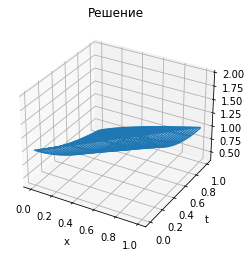

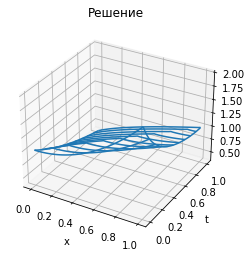

In [79]:
%matplotlib notebook

#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import axes3d 
%matplotlib inline

tm = np.linspace(T_begin,T_end, num=M)
xn = np.linspace(X_begin, X_end, num=N)

X, T = np.meshgrid(xn, tm)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(X, T, y, rstride=10,cstride=1)
plt.title('Решение')
#plt.xlabel('x')
plt.ylabel('t')
plt.xlabel('x')
plt.show()

# rotate the axes and update
#for angle in range(0, 360):
 #   ax.view_init(30, angle)
  #  plt.draw()
   # plt.pause(.001)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(X, T, y, rstride=5,cstride=100)
plt.title('Решение')
#plt.xlabel('x')
plt.ylabel('t')
plt.xlabel('x')
plt.show()